## Cancer Data Classifications

#### In this notebook, we will run the following classification algorithms from scikit-learn:
 * KNN
 * Decsion Tree
 * Random Forest
 * Logistic Regression
 * SVM
 * Neural Network
 

### Process Data 

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [5]:
cancer=load_breast_cancer()
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [6]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
print(cancer.target_names)

['malignant' 'benign']


In [5]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
cancer.data.shape

(569, 30)

In [9]:
import pandas as pd
cancer_dataset=pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_dataset['target']=cancer.target

In [8]:
cancer_dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0


In [12]:
import getpass
import os

In [17]:
password = getpass.getpass()

········


In [18]:
command = "sudo -S pip install mglearn"
os.system('echo %s | %s' % (password, command))

256

In [16]:
import mglearn

ImportError: No module named 'mglearn'

## KNN

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


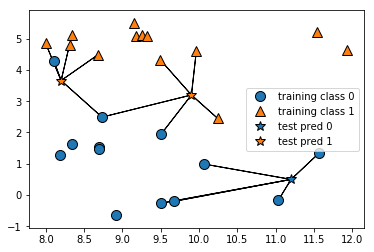

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
print('Accuracy of KNN n-5,on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN n-5,on the test set: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN n-5,on the training set: 0.946
Accuracy of KNN n-5,on the test set: 0.930


### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
log_reg=LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
print('Accuracy on Logistic on the training set: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy of Logistic on the test set: {:.3f}'.format(log_reg.score(X_test, y_test)))

Accuracy on Logistic on the training set: 0.955
Accuracy of Logistic on the test set: 0.958


In [24]:
log_reg=LogisticRegression(C=10000)
log_reg.fit(X_train, y_train)
print('Accuracy on Logistic on the training set: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy of Logistic on the test set: {:.3f}'.format(log_reg.score(X_test, y_test)))

Accuracy on Logistic on the training set: 0.988
Accuracy of Logistic on the test set: 0.986


## Decision Tree

Feature importances: [0. 1.]


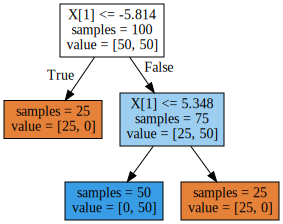

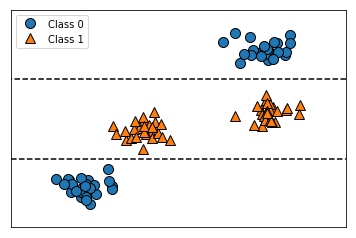

In [26]:
import numpy as np
mglearn.plots.plot_tree_not_monotone()

In [27]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('Accuracy on DT on the training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy of DT on the test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on DT on the training set: 1.000
Accuracy of DT on the test set: 0.923


In [29]:
tree=DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
print('Accuracy on DT on the training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy of DT on the test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on DT on the training set: 0.988
Accuracy of DT on the test set: 0.944


In [31]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

dot_data=export_graphviz(tree, out_file=None, class_names=['malignant','benign'], feature_names=cancer.feature_names,
                        impurity=False, filled=True)

graph = graph_from_dot_data(dot_data)
graph.write_png('cancer_tree.png')

True

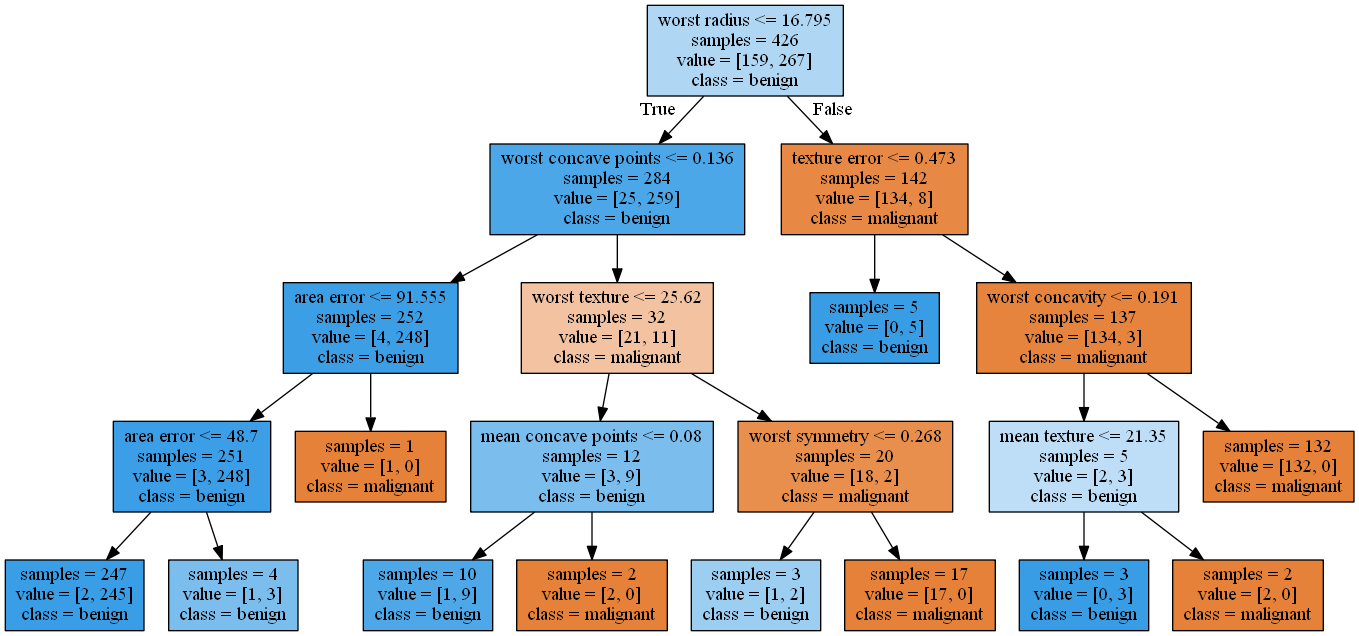

In [32]:
Image(filename='cancer_tree.png')

### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d

forest=RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)
print('Accuracy on RF on the training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy of RF on the test set: {:.3f}'.format(forest.score(X_test, y_test)))


Accuracy on RF on the training set: 1.000
Accuracy of RF on the test set: 0.958


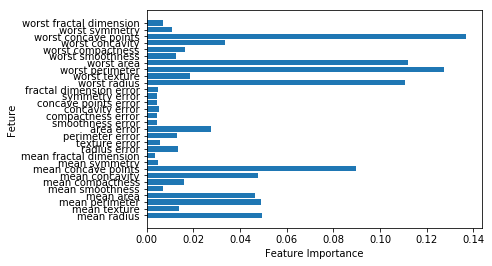

In [37]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feture')
plt.show()

## SVM

In [38]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train, y_train)
print('Accuracy on SVM on the training set: {:.3f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM on the test set: {:.3f}'.format(svm.score(X_test, y_test)))

Accuracy on SVM on the training set: 1.000
Accuracy of SVM on the test set: 0.629


In [39]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train
X_test_scaled = (X_test - min_train)/range_train
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
print('Accuracy on SVM on the training set: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('Accuracy of SVM on the test set: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

Accuracy on SVM on the training set: 0.955
Accuracy of SVM on the test set: 0.944


In [42]:
svm=SVC(C=1000)
svm.fit(X_train_scaled, y_train)
print('Accuracy on SVM on the training set: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('Accuracy of SVM on the test set: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

Accuracy on SVM on the training set: 0.988
Accuracy of SVM on the test set: 0.986


## Neural Networks

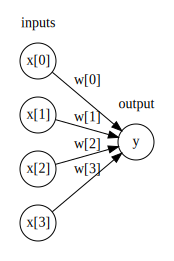

In [43]:
mglearn.plots.plot_logistic_regression_graph()

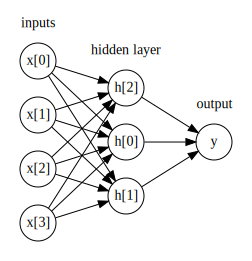

In [44]:
mglearn.plots.plot_single_hidden_layer_graph()

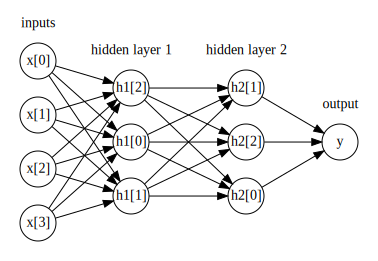

In [45]:
mglearn.plots.plot_two_hidden_layer_graph()

In [46]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print('Accuracy on NN on the training set: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy of NN on the test set: {:.3f}'.format(mlp.score(X_test, y_test)))

Accuracy on NN on the training set: 0.885
Accuracy of NN on the test set: 0.832


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled =scaler.fit(X_train).transform(X_train)
X_test_scaled =scaler.fit(X_test).transform(X_test)

mlp=MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
print('Accuracy on NN on the training set: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy of NN on the test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on NN on the training set: 0.995
Accuracy of NN on the test set: 0.979
